In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bodyfat1.csv')

DATA EXPLORATION AND PREPROCESSING

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.057515,14.393674,52.0,171.908031,69.525002,36.189046,92.596628,88.145554,99.227560,61.061941,38.449940,24.585694,32.737841,30.032953,17.884161
1,1.087162,7.231340,37.0,128.709935,68.101580,34.008905,84.936771,66.900116,88.021104,48.031874,34.448624,22.394509,29.088877,26.715337,16.965966
2,1.072011,18.097645,59.0,154.224825,71.633081,38.181368,95.117918,81.861668,90.303136,50.654032,37.039319,23.418945,30.365791,28.335635,18.453307
3,1.070507,12.790562,29.0,177.354744,73.112194,36.016364,96.627624,83.275016,99.308128,58.903586,37.732440,22.251009,34.009153,28.955364,17.404251
4,1.040402,24.975682,33.0,215.300455,67.536871,41.874999,109.179973,104.548193,107.954978,69.090287,41.501132,25.841805,38.284014,32.883779,19.469716


In [4]:
rows = df.shape[0]
cols = df.shape[1]
print(f'There are {rows} rows and {cols} columns')

There are 20000 rows and 15 columns


In [5]:
df.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
19995,1.072154,10.445979,31.714270,170.488800,67.268624,36.088408,96.894658,88.434575,101.128012,59.592987,38.421255,21.922346,27.925118,28.464835,18.589704
19996,1.056674,19.405877,27.094276,232.875536,74.170407,40.944887,112.861202,104.348320,111.096330,67.854682,41.264864,25.775718,37.418241,32.142409,19.192041
19997,1.072834,11.557388,54.162763,137.808186,68.677067,34.600698,90.358038,78.211619,89.690674,55.670789,34.031839,22.973639,30.961333,25.655523,17.396714
19998,1.036306,24.551402,46.068398,206.379708,66.797020,37.884983,106.053426,102.756525,112.052281,65.230491,38.753488,24.644389,38.706960,29.850620,18.461134
19999,1.047714,14.453564,48.905495,171.634584,68.957213,39.971045,102.311580,87.073430,98.268366,58.881531,37.520182,22.136761,31.065877,29.863648,17.987374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  20000 non-null  float64
 1   BodyFat  20000 non-null  float64
 2   Age      20000 non-null  float64
 3   Weight   20000 non-null  float64
 4   Height   20000 non-null  float64
 5   Neck     20000 non-null  float64
 6   Chest    20000 non-null  float64
 7   Abdomen  20000 non-null  float64
 8   Hip      20000 non-null  float64
 9   Thigh    20000 non-null  float64
 10  Knee     20000 non-null  float64
 11  Ankle    20000 non-null  float64
 12  Biceps   20000 non-null  float64
 13  Forearm  20000 non-null  float64
 14  Wrist    20000 non-null  float64
dtypes: float64(15)
memory usage: 2.3 MB


In [7]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.055242,19.319797,44.853739,179.652598,70.194708,38.035153,100.991267,92.739908,100.052549,59.507578,38.648992,23.141619,32.356908,28.729511,18.250173
std,0.019052,8.682523,12.607684,29.326087,3.720547,2.458195,8.409333,10.642609,7.151412,5.261966,2.390050,1.676029,3.016642,2.023962,0.934552
min,0.982482,0.000000,-3.187730,58.493571,29.430338,27.534063,69.801997,52.757048,69.554097,39.808837,29.132192,15.894276,19.488742,20.669460,14.545708
25%,1.042418,13.290939,36.117632,159.987617,67.730785,36.362770,95.340079,85.539215,95.243414,55.991391,37.053407,22.005941,30.310900,27.360249,17.617431
50%,1.055219,19.246126,45.000000,179.297284,70.187966,38.033771,100.988279,92.651710,100.039155,59.534820,38.664168,23.157662,32.347624,28.722514,18.253861
75%,1.068110,25.116768,53.426094,199.240327,72.694493,39.675200,106.572091,99.969004,104.872263,63.096603,40.263510,24.291929,34.369382,30.107638,18.889375
max,1.130070,57.593438,94.310326,306.255135,83.594412,48.250678,131.149786,131.226509,131.419136,80.653565,47.159246,33.900000,44.849411,36.980448,22.225641


Check for missing values

In [8]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Check for duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

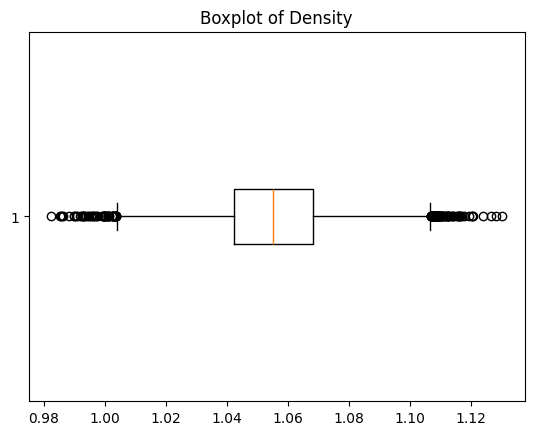

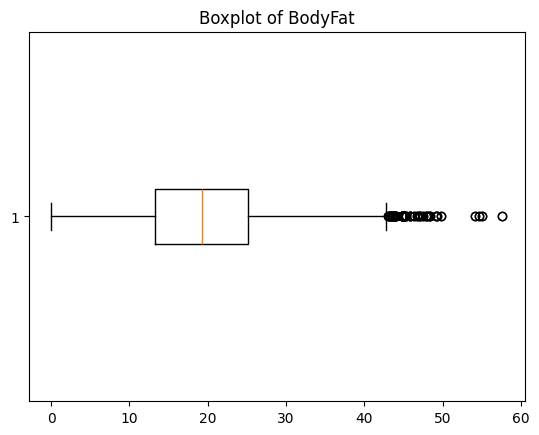

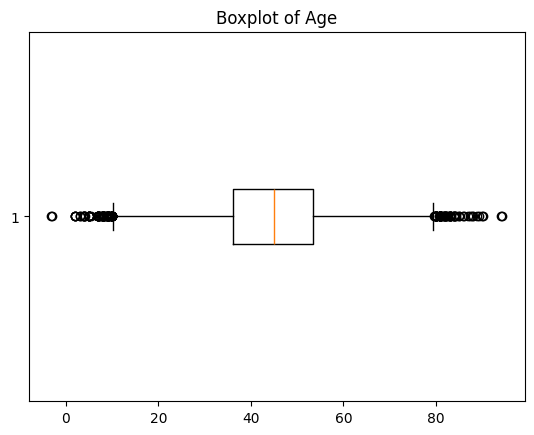

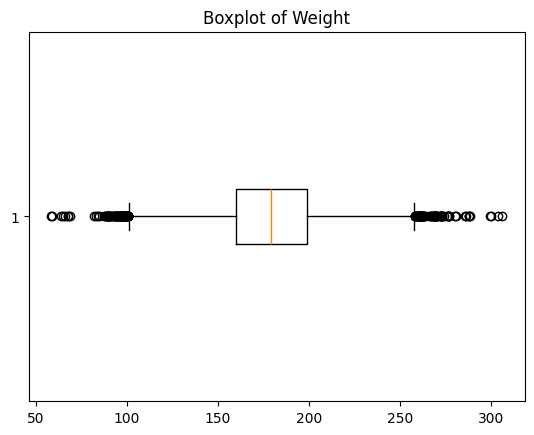

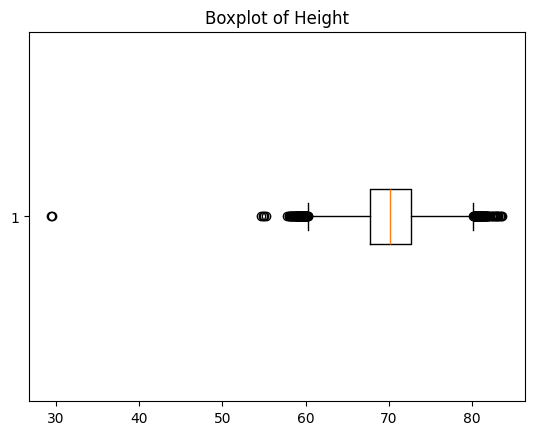

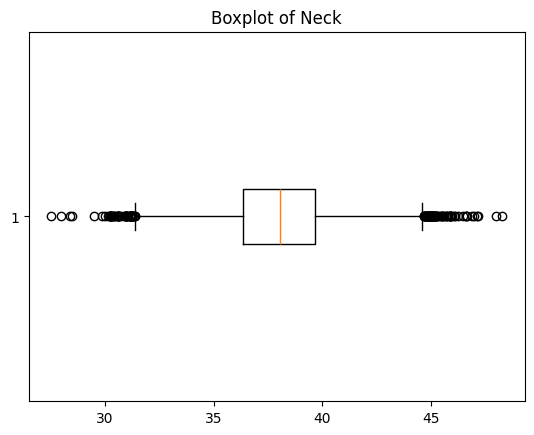

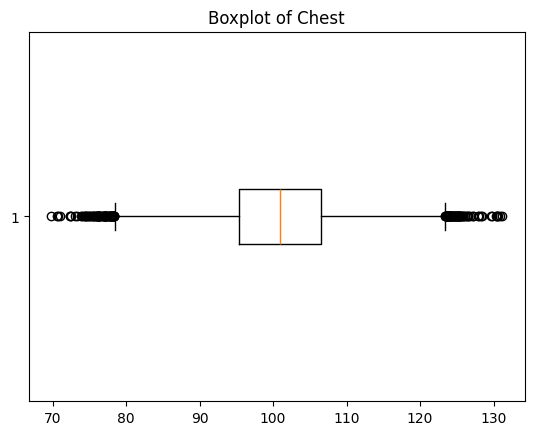

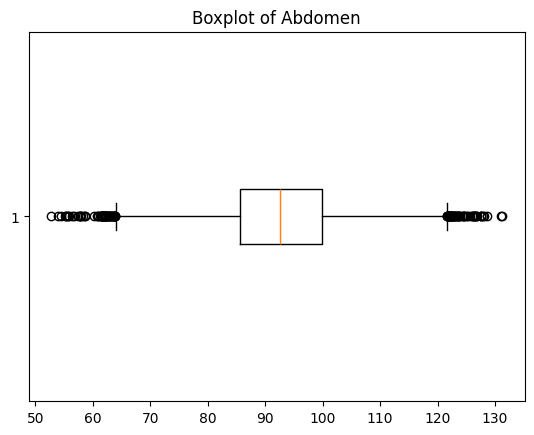

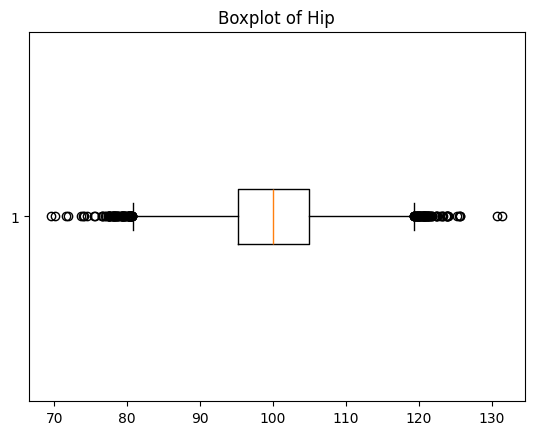

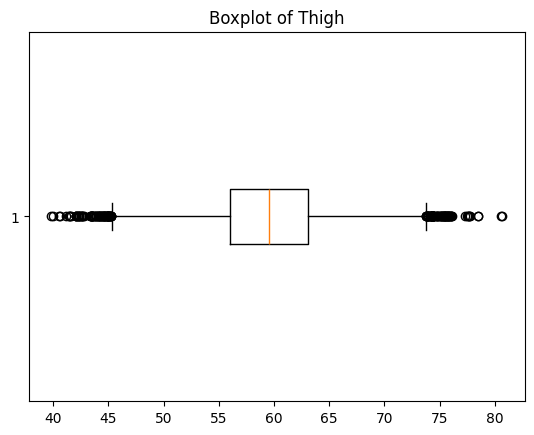

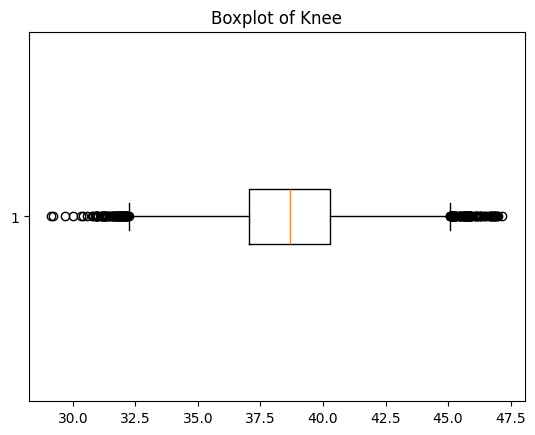

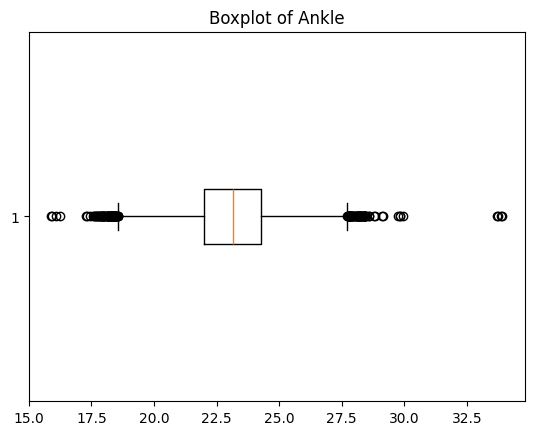

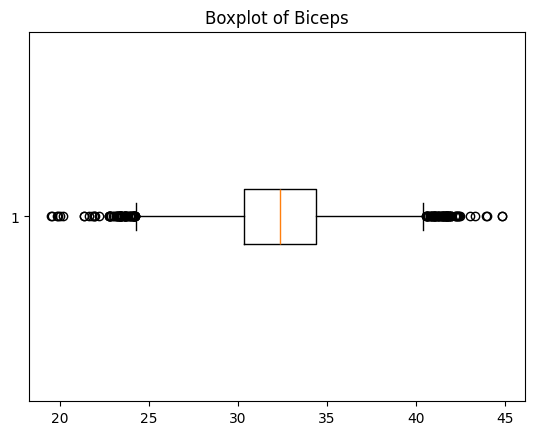

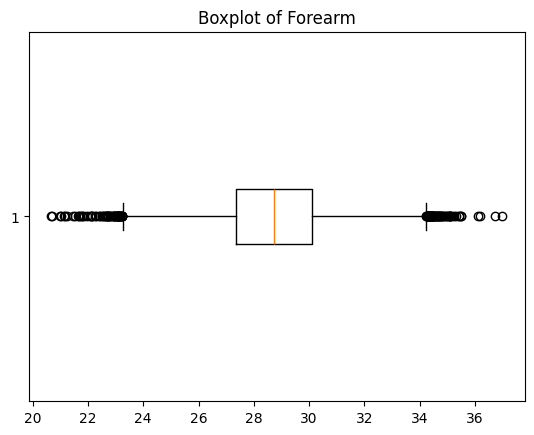

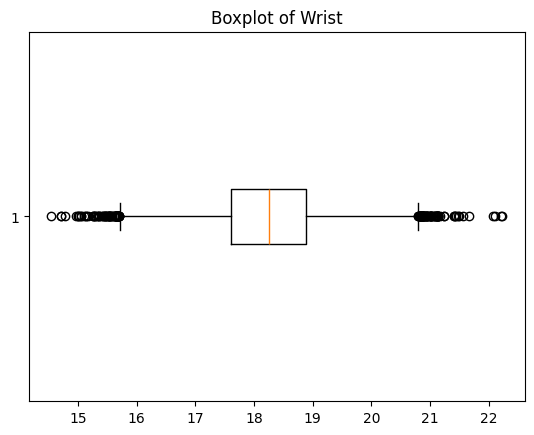

In [10]:
for i in df.columns:
  plt.boxplot(df[i], vert = False)
  plt.title(f'Boxplot of {i}')
  plt.show()

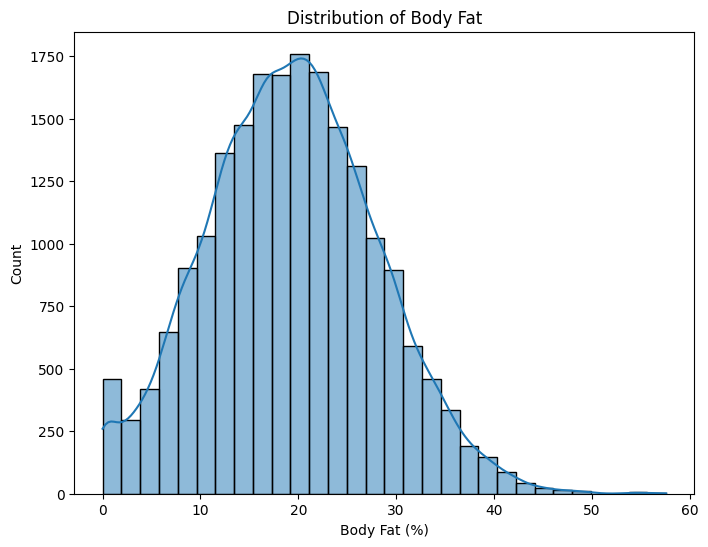

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title(f'Distribution of Body Fat')
plt.xlabel( 'Body Fat (%)')
plt.show()

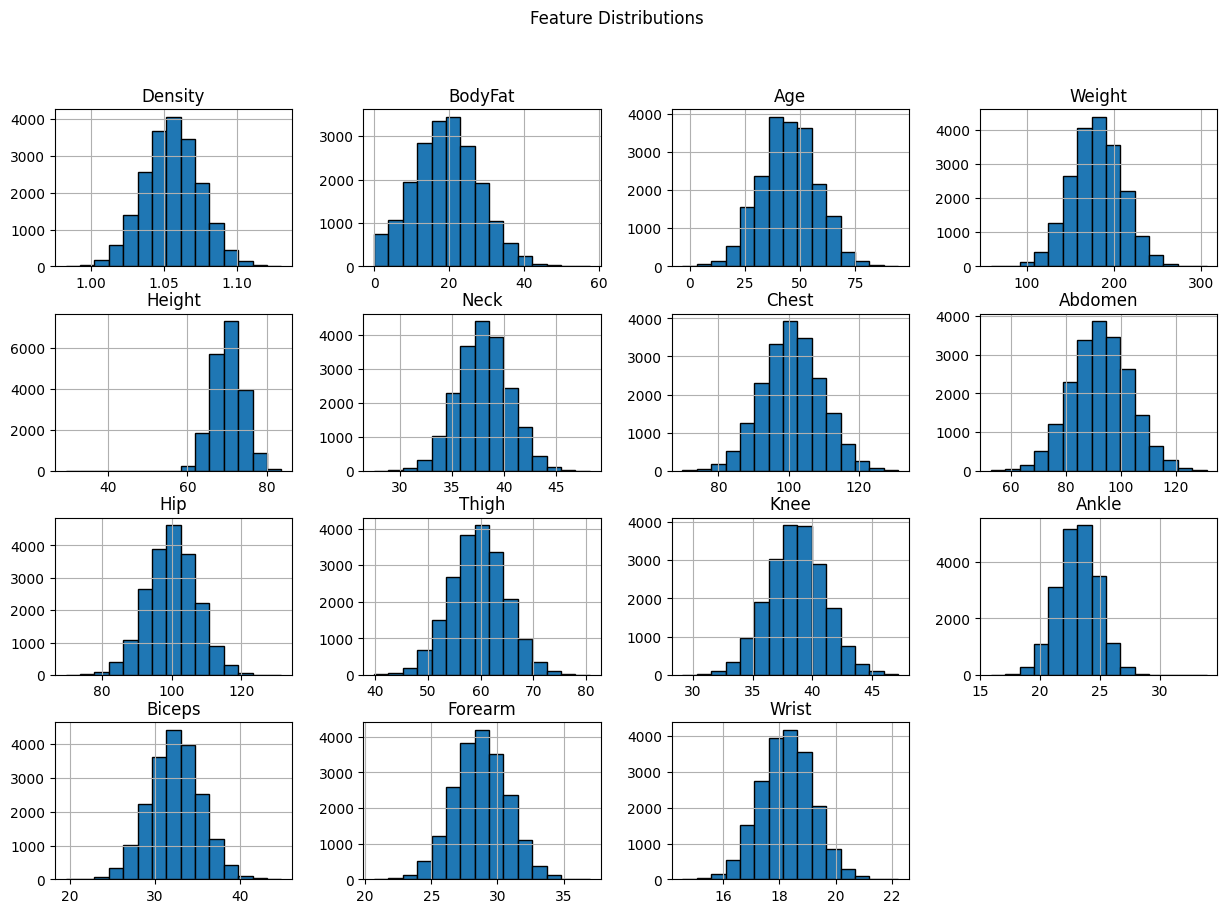

In [12]:
df.hist(bins = 15, edgecolor = 'black', figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [13]:

correlation_matrix = df.corr()
correlation_matrix

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.902237,-0.266964,-0.567600,0.102050,-0.446844,-0.660258,-0.778761,-0.590911,-0.540658,-0.475407,-0.246053,-0.469141,-0.342444,-0.308753
BodyFat,-0.902237,1.000000,0.271104,0.554603,-0.089805,0.440656,0.642483,0.751890,0.573219,0.516521,0.463046,0.238546,0.447072,0.329403,0.312023
Age,-0.266964,0.271104,1.000000,-0.031775,-0.181342,0.095735,0.156525,0.218594,-0.062146,-0.207614,0.000123,-0.119205,-0.053324,-0.090414,0.198659
Weight,-0.567600,0.554603,-0.031775,1.000000,0.318255,0.833211,0.893036,0.883261,0.938313,0.869912,0.850679,0.606367,0.801654,0.629392,0.731408
Height,0.102050,-0.089805,-0.181342,0.318255,1.000000,0.262813,0.139894,0.093129,0.177740,0.155598,0.290559,0.274608,0.213765,0.227526,0.329933
Neck,-0.446844,0.440656,0.095735,0.833211,0.262813,1.000000,0.787776,0.753490,0.734724,0.699240,0.672359,0.476832,0.728483,0.615113,0.748707
Chest,-0.660258,0.642483,0.156525,0.893036,0.139894,0.787776,1.000000,0.912818,0.827314,0.733223,0.718919,0.475568,0.728330,0.584913,0.659531
Abdomen,-0.778761,0.751890,0.218594,0.883261,0.093129,0.753490,0.912818,1.000000,0.871369,0.768174,0.732801,0.443449,0.682759,0.503357,0.617831
Hip,-0.590911,0.573219,-0.062146,0.938313,0.177740,0.734724,0.827314,0.871369,1.000000,0.897428,0.822386,0.545603,0.739525,0.542236,0.628568
Thigh,-0.540658,0.516521,-0.207614,0.869912,0.155598,0.699240,0.733223,0.768174,0.897428,1.000000,0.799959,0.532961,0.762479,0.565728,0.561563


In [14]:
correlation_matrix['BodyFat']

Density   -0.902237
BodyFat    1.000000
Age        0.271104
Weight     0.554603
Height    -0.089805
Neck       0.440656
Chest      0.642483
Abdomen    0.751890
Hip        0.573219
Thigh      0.516521
Knee       0.463046
Ankle      0.238546
Biceps     0.447072
Forearm    0.329403
Wrist      0.312023
Name: BodyFat, dtype: float64

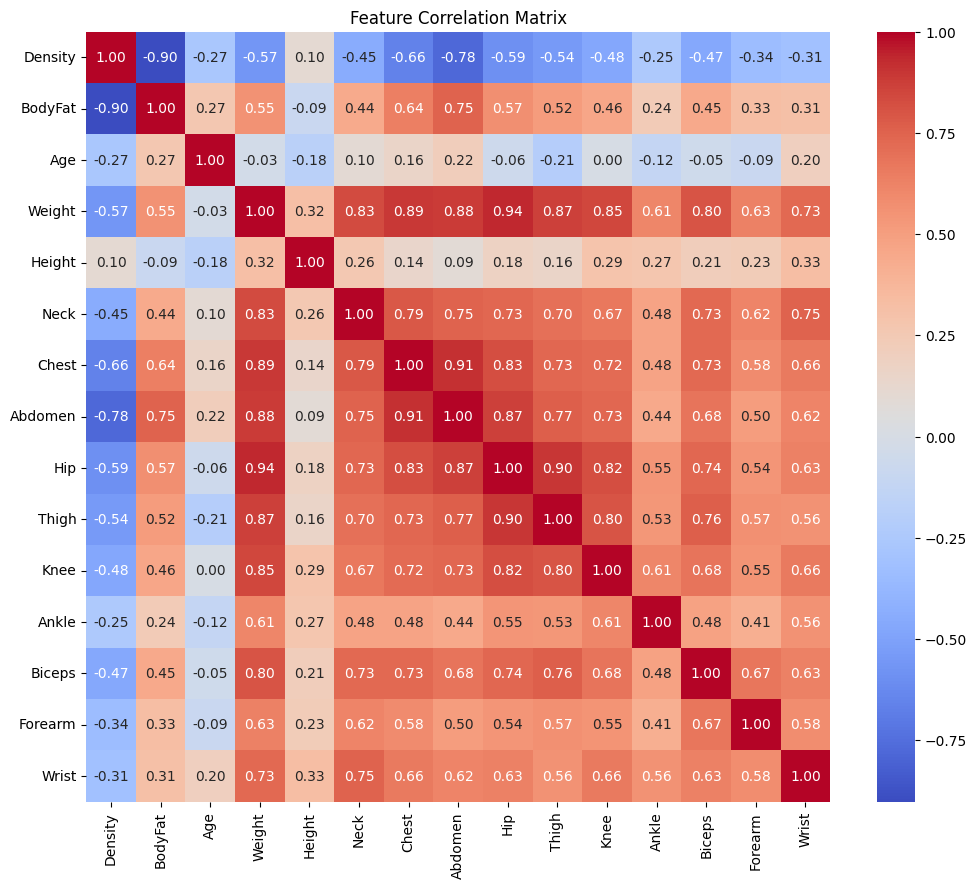

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

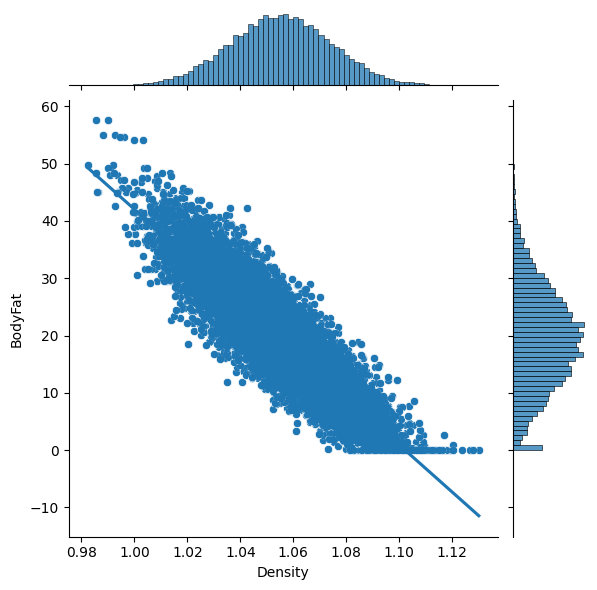

In [16]:
density_bodyfat = df[['Density', 'BodyFat']]

fig = sns.jointplot(x = 'Density', y = 'BodyFat', data = df)

fig1 = fig.plot_joint(sns.regplot, scatter_kws = {'s':10})

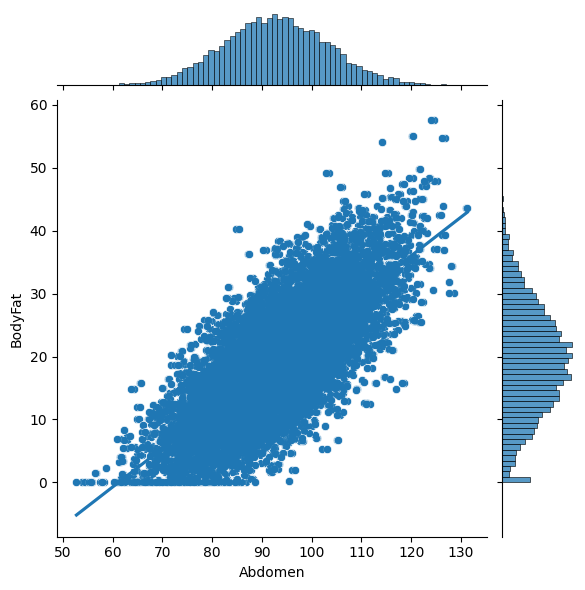

In [17]:
abdomen_bodyfat = df[['Abdomen', 'BodyFat']]

fig = sns.jointplot(x = 'Abdomen', y = 'BodyFat', data = df)

fig1 = fig.plot_joint(sns.regplot, scatter_kws = {'s':10})

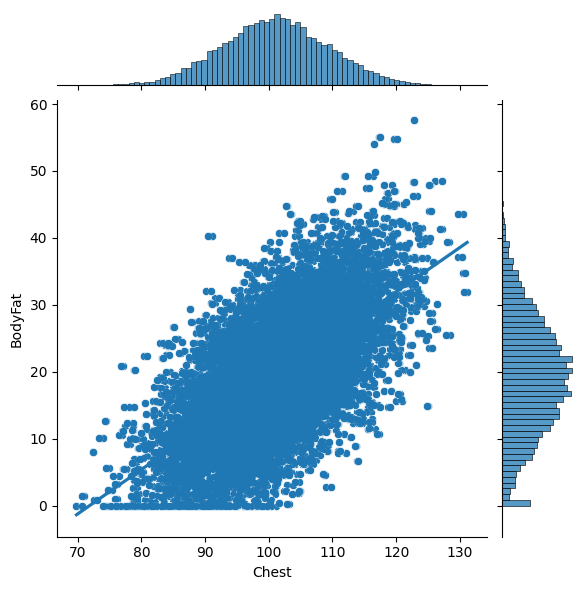

In [18]:
chest_bodyfat = df[['Chest', 'BodyFat']]

fig = sns.jointplot(x = 'Chest', y = 'BodyFat', data = df)

fig1 = fig.plot_joint(sns.regplot, scatter_kws = {'s':10})

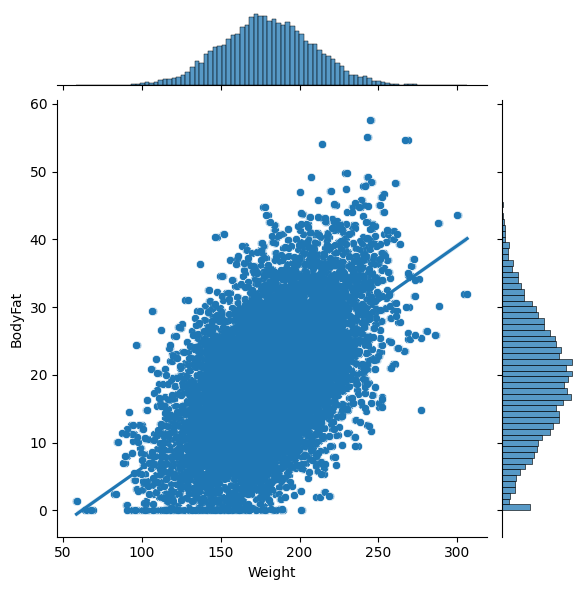

In [19]:
weight_bodyfat = df[['Weight', 'BodyFat']]

fig = sns.jointplot(x = 'Weight', y = 'BodyFat', data = df)

fig1 = fig.plot_joint(sns.regplot, scatter_kws = {'s':10})

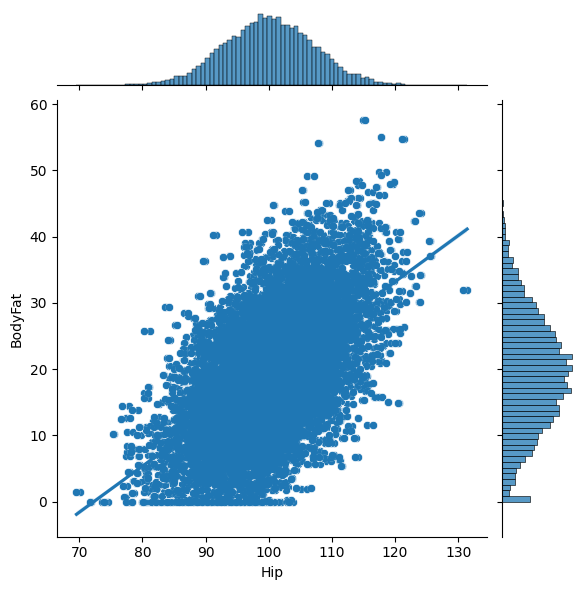

In [20]:
hip_bodyfat = df[['Hip', 'BodyFat']]

fig = sns.jointplot(x = 'Hip', y = 'BodyFat', data = df)

fig1 = fig.plot_joint(sns.regplot, scatter_kws = {'s':10})

In [21]:
x = df.drop(['BodyFat'], axis=1)
y = df['BodyFat']

Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state = 0)

Standardiztion

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

results = {}

def evaluate(name, model):
  model.fit(x_train, y_train)
  pred_train = model.predict(x_train)
  pred_test = model.predict(x_test)

  train_accuracy = r2_score(y_train, pred_train)
  test_accuracy = r2_score(y_test, pred_test)
  gap = abs(train_accuracy - test_accuracy)

  if gap < 0.02:
    status = 'Good Fit'
  elif gap > 0.02:
    status = 'Over Fit'
  else:
    status = 'Under Fit'

  results[name] = {
    'model': model,
    'train accuracy': train_accuracy,
    'test accuracy' : test_accuracy,
    'gap': gap,
    'status': status,
    'pred_test': pred_test,
  }
  print(f"{name}: Train={train_accuracy:.3f}, Test={test_accuracy:.3f}, Gap={gap:.3f}, {status}")

for name,m in models.items():
  evaluate(name,m)


Linear Regression: Train=0.825, Test=0.810, Gap=0.014, Good Fit
Ridge Regression: Train=0.825, Test=0.810, Gap=0.014, Good Fit
Lasso Regression: Train=0.808, Test=0.794, Gap=0.015, Good Fit
Elastic Net Regression: Train=0.741, Test=0.724, Gap=0.017, Good Fit
Decision Tree Regressor: Train=1.000, Test=0.659, Gap=0.341, Over Fit


Summary Table

In [25]:
summary=pd.DataFrame({
    name:{
        'Train Accuracy':info['train accuracy'],
        'Test Accuracy':info['test accuracy'],
        'Gap':info['gap'],
        'Status':info['status']
    } for name,info in results.items()
}).T

summary

,Train Accuracy,Test Accuracy,Gap,Status
Linear Regression,0.824776,0.8104,0.014376,Good Fit
Ridge Regression,0.824776,0.8104,0.014376,Good Fit
Lasso Regression,0.808238,0.793732,0.014506,Good Fit
Elastic Net Regression,0.740563,0.723518,0.017045,Good Fit
Decision Tree Regressor,1.0,0.659367,0.340633,Over Fit


In [26]:
scores={}
penalty=0.2

for name,info in results.items():
    scores[name]=info['test accuracy']-penalty*abs(info['gap'])

best_model_name=max(scores,key=scores.get)
best_model=results[best_model_name]['model']
best_model_name, scores[best_model_name]

('Linear Regression', 0.8075251512370919)

Hypertuning Parameter

In [27]:
param_grids = {
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1, 10, 100]
    },
    'Lasso Regression': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    },
    'Elastic Net Regression': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'Decision Tree Regressor': {
        'max_depth': [3, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
def tune_and_evaluate(name, model, param_grid):
    print(f"\n----- Tuning {name} -----")
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter = 20,
        cv=5,
        n_jobs=1,
        random_state = 42,
        scoring='r2'
    )
    search.fit(x_train, y_train)

    print(f"Best params for {name}: {search.best_params_}")
    print(f"Best CV score (R²): {search.best_score_:.3f}")

    best_model = search.best_estimator_
    tuned_name = name + " (tuned)"
    evaluate(tuned_name, best_model)



print("=== Base Models ===")
for name, m in models.items():
    evaluate(name, m)

print("\n\n=== Hyperparameter Tuned Models ===")
for name, m in models.items():
    if name in param_grids:
        tune_and_evaluate(name, m, param_grids[name])
    else:
        print(f"\nNo hyperparameters defined for {name}, skipping tuning.")


=== Base Models ===
Linear Regression: Train=0.825, Test=0.810, Gap=0.014, Good Fit
Ridge Regression: Train=0.825, Test=0.810, Gap=0.014, Good Fit
Lasso Regression: Train=0.808, Test=0.794, Gap=0.015, Good Fit
Elastic Net Regression: Train=0.741, Test=0.724, Gap=0.017, Good Fit
Decision Tree Regressor: Train=1.000, Test=0.656, Gap=0.344, Over Fit


=== Hyperparameter Tuned Models ===

No hyperparameters defined for Linear Regression, skipping tuning.

----- Tuning Ridge Regression -----
Best params for Ridge Regression: {'alpha': 10}
Best CV score (R²): 0.824
Ridge Regression (tuned): Train=0.825, Test=0.810, Gap=0.014, Good Fit

----- Tuning Lasso Regression -----


c:\Data Science\Project_ML\project_ml_env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Data Science\Project_ML\project_ml_env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for Lasso Regression: {'alpha': 0.01}
Best CV score (R²): 0.824
Lasso Regression (tuned): Train=0.825, Test=0.810, Gap=0.014, Good Fit

----- Tuning Elastic Net Regression -----
Best params for Elastic Net Regression: {'l1_ratio': 0.9, 'alpha': 0.01}
Best CV score (R²): 0.824
Elastic Net Regression (tuned): Train=0.825, Test=0.810, Gap=0.014, Good Fit

----- Tuning Decision Tree Regressor -----


c:\Data Science\Project_ML\project_ml_env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for Decision Tree Regressor: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7}
Best CV score (R²): 0.809
Decision Tree Regressor (tuned): Train=0.834, Test=0.799, Gap=0.035, Over Fit


In [29]:
import pickle

best_model_name = max(results, key=lambda k: results[k]['test accuracy'])
final_model = results[best_model_name]['model']

# Save final tuned model
with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)


# Save feature column order
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(list(x.columns), f)

print("Final tuned model saved successfully!")

Final tuned model saved successfully!
